In [1]:
# import statements
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib.patches import Patch
from sodapy import Socrata

In [2]:
pd.set_option('display.max_columns', None)

## Obtain Data

In [3]:
client = Socrata("data.cityofnewyork.us", None)

dataset_id = "43nn-pn8j"
limit = 50000
offset = 0
all_data = []

while True:
    print(f"Fetching rows {offset} to {offset + limit}...")
    results = client.get(dataset_id, limit=limit, offset=offset)
    if not results:
        break
    all_data.extend(results)
    offset += limit
    
df_raw = pd.DataFrame.from_records(all_data)

df_raw = df_raw[df_raw['boro']== "Manhattan"] # for Manhattan specifically

print(f"Total rows downloaded: {len(df_raw)}")


Fetching rows 0 to 50000...
Fetching rows 50000 to 100000...
Fetching rows 100000 to 150000...
Fetching rows 150000 to 200000...
Fetching rows 200000 to 250000...
Fetching rows 250000 to 300000...
Fetching rows 300000 to 350000...
Total rows downloaded: 102107


## Examine Data

In [4]:
# Examine df
df_raw.head(10)

,camis,dba,boro,building,street,zipcode,phone,inspection_date,critical_flag,record_date,latitude,longitude,community_board,council_district,census_tract,bin,bbl,nta,cuisine_description,action,inspection_type,violation_code,violation_description,score,grade,grade_date
0,50116505,SWEET TOOTH,Manhattan,42,WEST 42 STREET,10036,7186078306,1900-01-01T00:00:00.000,Not Applicable,2025-04-02T06:00:13.000,40.754068239421,-73.982321170752,105,04,008400,1085593,1012570002,MN17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,50145547,ARRATA'S CATERING CORP,Manhattan,1,RANDALLS IS,10035,7183506406,1900-01-01T00:00:00.000,Not Applicable,2025-04-02T06:00:13.000,40.794827213161,-73.921696544711,111,08,024000,1000000,1018190203,MN99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,50167048,NY SOHO COFFEE INC,Manhattan,447,BROADWAY,10013,9176607690,1900-01-01T00:00:00.000,Not Applicable,2025-04-02T06:00:13.000,40.720385855315,-74.001053409379,102,01,004700,1003022,1002310037,MN24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,50157962,SUGAR SWEET SUNSHINE INC.,Manhattan,365,GRAND STREET,10002,9179719080,1900-01-01T00:00:00.000,Not Applicable,2025-04-02T06:00:13.000,40.716592049592,-73.988856864214,103,01,001401,1077604,1003110013,MN28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,50108278,120 ORCHARD BAR LLC,Manhattan,120,ORCHARD STREET,10002,1914906246,1900-01-01T00:00:00.000,Not Applicable,2025-04-02T06:00:13.000,40.719441183278,-73.989541813883,103,01,001800,1005302,1004100001,MN27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,50149500,SHO TSE,Manhattan,120,CHRISTOPHER STREET,10014,6465298339,1900-01-01T00:00:00.000,Not Applicable,2025-04-02T06:00:13.000,40.733162606532,-74.005664969406,102,03,007300,1084948,1005880045,MN23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,50167187,BAGEL PUB,Manhattan,110,UNIVERSITY PLACE,10003,7182167376,1900-01-01T00:00:00.000,Not Applicable,2025-04-02T06:00:13.000,40.734276875319,-73.992494691609,102,02,006100,1009386,1005707503,MN23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,50167367,THE DUE FAMILY INC,Manhattan,20,EAST 49 STREET,10017,2014703281,1900-01-01T00:00:00.000,Not Applicable,2025-04-02T06:00:13.000,40.757509172347,-73.97673983586,105,04,009400,1035447,1012840060,MN17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,50165096,OSUKAA NY CORP,Manhattan,373,MADISON AVENUE,10017,9176706231,1900-01-01T00:00:00.000,Not Applicable,2025-04-02T06:00:13.000,40.755200983759,-73.977513069246,105,04,009400,1035393,1012810021,MN17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,50162554,MPA PIZZA INC.,Manhattan,606,9 AVENUE,10036,9293732674,1900-01-01T00:00:00.000,Not Applicable,2025-04-02T06:00:13.000,40.759284364397,-73.991990117228,104,03,012100,1024958,1010340002,MN15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Get df size

df_raw.shape

(102107, 26)

In [6]:
# Check col values

df_raw.columns

Index(['camis', 'dba', 'boro', 'building', 'street', 'zipcode', 'phone',
       'inspection_date', 'critical_flag', 'record_date', 'latitude',
       'longitude', 'community_board', 'council_district', 'census_tract',
       'bin', 'bbl', 'nta', 'cuisine_description', 'action', 'inspection_type',
       'violation_code', 'violation_description', 'score', 'grade',
       'grade_date'],
      dtype='object')

In [7]:
# Check null values
df_raw.isnull().sum()


camis                        0
dba                          0
boro                         0
building                    79
street                       0
zipcode                   1498
phone                        4
inspection_date              0
critical_flag                0
record_date                  0
latitude                   113
longitude                  113
community_board           1689
council_district          1673
census_tract              1673
bin                       2124
bbl                        191
nta                       1689
cuisine_description       1438
action                    1438
inspection_type           1438
violation_code            2211
violation_description     2211
score                     6218
grade                    52045
grade_date               55269
dtype: int64

## Data Cleaning

In [8]:
# Remove rows that have a nan value in grade
# only intersted in values that have a grade

df_clean=df_raw.copy()

df_clean=df_clean.dropna(subset=['grade'])

# review nan values
df_clean.isnull().sum()

camis                       0
dba                         0
boro                        0
building                   57
street                      0
zipcode                   749
phone                       4
inspection_date             0
critical_flag               0
record_date                 0
latitude                   78
longitude                  78
community_board           879
council_district          870
census_tract              870
bin                      1109
bbl                       130
nta                       879
cuisine_description         0
action                      0
inspection_type             0
violation_code            244
violation_description     244
score                       5
grade                       0
grade_date               3224
dtype: int64

In [9]:
# filter for dates from 2010 onwards
df_clean['grade_date'] = pd.to_datetime(df_clean['grade_date'], errors='coerce')
df_clean=df_clean[df_clean['grade_date'].dt.year>=2015]

# change to date time format of inspection_date
df_clean['inspection_date'] = pd.to_datetime(df_clean['inspection_date'], errors='coerce')

# change data type
df_clean['zipcode'] = pd.to_numeric(df_clean['zipcode'], errors='coerce')
df_clean['latitude'] = pd.to_numeric(df_clean['latitude'], errors='coerce')
df_clean['longitude'] = pd.to_numeric(df_clean['longitude'], errors='coerce')
df_clean['score'] = pd.to_numeric(df_clean['score'], errors='coerce')

In [10]:
# important to note duplicate restaurants are included for different years, inspections, etc.
df_clean.sort_values(by='camis',ascending=True).head(80)

,camis,dba,boro,building,street,zipcode,phone,inspection_date,critical_flag,record_date,latitude,longitude,community_board,council_district,census_tract,bin,bbl,nta,cuisine_description,action,inspection_type,violation_code,violation_description,score,grade,grade_date
154778,30191841,D.J. REYNOLDS,Manhattan,351,WEST 57 STREET,10019.0,2122452912,2025-02-20,Critical,2025-04-02T06:00:10.000,40.767326,-73.984310,104,03,013900,1026048,1010480008,MN15,Irish,Violations were cited in the following area(s).,Cycle Inspection / Re-inspection,06D,"Food contact surface not properly washed, rins...",10.0,A,2025-02-20
184010,30191841,D.J. REYNOLDS,Manhattan,351,WEST 57 STREET,10019.0,2122452912,2023-04-23,Critical,2025-04-02T06:00:10.000,40.767326,-73.984310,104,03,013900,1026048,1010480008,MN15,Irish,Violations were cited in the following area(s).,Cycle Inspection / Initial Inspection,06E,"Sanitized equipment or utensil, including in-u...",10.0,A,2023-04-23
173812,30191841,D.J. REYNOLDS,Manhattan,351,WEST 57 STREET,10019.0,2122452912,2023-04-23,Critical,2025-04-02T06:00:10.000,40.767326,-73.984310,104,03,013900,1026048,1010480008,MN15,Irish,Violations were cited in the following area(s).,Cycle Inspection / Initial Inspection,06C,"Food, supplies, or equipment not protected fro...",10.0,A,2023-04-23
124837,30191841,D.J. REYNOLDS,Manhattan,351,WEST 57 STREET,10019.0,2122452912,2025-02-20,Critical,2025-04-02T06:00:10.000,40.767326,-73.984310,104,03,013900,1026048,1010480008,MN15,Irish,Violations were cited in the following area(s).,Cycle Inspection / Re-inspection,06C,"Food, supplies, or equipment not protected fro...",10.0,A,2025-02-20
243991,40359480,1 EAST 66TH STREET KITCHEN,Manhattan,1,EAST 66 STREET,10065.0,2128793900,2019-10-01,Not Critical,2025-04-02T06:00:10.000,40.768547,-73.969581,108,04,012200,1041159,1013810001,MN40,American,Violations were cited in the following area(s).,Cycle Inspection / Initial Inspection,10F,Non-food contact surface improperly constructe...,9.0,A,2019-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163023,40364467,NYAC MAIN DINING ROOM,Manhattan,180,CENTRAL PARK SOUTH,10019.0,2127677085,2023-04-05,Critical,2025-04-02T06:00:10.000,40.766718,-73.978737,105,04,013700,1023750,1010110001,MN17,American,Violations were cited in the following area(s).,Cycle Inspection / Initial Inspection,06D,"Food contact surface not properly washed, rins...",8.0,A,2023-04-05
215369,40364467,NYAC MAIN DINING ROOM,Manhattan,180,CENTRAL PARK SOUTH,10019.0,2127677085,2025-01-29,Not Critical,2025-04-02T06:00:10.000,40.766718,-73.978737,105,04,013700,1023750,1010110001,MN17,American,Violations were cited in the following area(s).,Cycle Inspection / Re-inspection,10F,Non-food contact surface or equipment made of ...,4.0,A,2025-01-29
222841,40364518,7B BAR,Manhattan,108,AVENUE B,10009.0,2126776742,2022-09-28,Not Critical,2025-04-02T06:00:10.000,40.724985,-73.981283,103,02,003200,1005094,1004020034,MN22,American,Violations were cited in the following area(s).,Cycle Inspection / Re-inspection,08A,Establishment is not free of harborage or cond...,10.0,A,2022-09-28
260694,40364518,7B BAR,Manhattan,108,AVENUE B,10009.0,2126776742,2022-09-28,Critical,2025-04-02T06:00:10.000,40.724985,-73.981283,103,02,003200,1005094,1004020034,MN22,American,Violations were cited in the following area(s).,Cycle Inspection / Re-inspection,04K,Evidence of rats or live rats in establishment...,10.0,A,2022-09-28


In [11]:
# want to see if  restaurants apppear in the same year

df_clean_check=df_clean.copy()

df_clean_check['year'] = df_clean_check['grade_date'].dt.year


df_clean_check = df_clean_check.groupby(['camis', 'year']).size().reset_index(name='count')

repeats = df_clean_check[df_clean_check['count'] > 1]

# Display
print(repeats.head())


      camis  year  count
0  30191841  2023      2
1  30191841  2025      2
2  40359480  2019      2
3  40359480  2022      2
4  40362264  2022      3


In [12]:
# remove uneeded columns

df_clean=df_clean.drop(columns=['dba', 'boro', 'building', 'street', 'phone', 'bin', 'nta', 'nta', 'action', 'violation_description'])

In [13]:
#drop remaining nan values
df_clean=df_clean.dropna(axis=0, how='any')
df_clean.isnull().sum()

camis                  0
zipcode                0
inspection_date        0
critical_flag          0
record_date            0
latitude               0
longitude              0
community_board        0
council_district       0
census_tract           0
bbl                    0
cuisine_description    0
inspection_type        0
violation_code         0
score                  0
grade                  0
grade_date             0
dtype: int64

In [14]:
#drop any rating other than a,b,c
df_clean = df_clean[df_clean['grade'].isin(['A', 'B', 'C'])]

In [15]:
# view finalized df

df_clean

,camis,zipcode,inspection_date,critical_flag,record_date,latitude,longitude,community_board,council_district,census_tract,bbl,cuisine_description,inspection_type,violation_code,score,grade,grade_date
51,50100510,10012.0,2022-02-11,Critical,2025-04-02T06:00:10.000,40.726454,-73.995732,102,02,005502,1005227502,American,Cycle Inspection / Initial Inspection,02B,11.0,A,2022-02-11
115,41618840,10003.0,2022-04-18,Not Critical,2025-04-02T06:00:10.000,40.733742,-73.992957,102,02,006100,1005690021,Mexican,Cycle Inspection / Initial Inspection,09B,12.0,A,2022-04-18
134,40398989,10022.0,2023-02-02,Critical,2025-04-02T06:00:10.000,40.758947,-73.974324,105,04,010200,1012870052,Italian,Cycle Inspection / Re-inspection,02B,13.0,A,2023-02-02
138,50050507,10001.0,2022-05-09,Critical,2025-04-02T06:00:10.000,40.746302,-73.994027,105,03,009500,1008027502,Salads,Cycle Inspection / Initial Inspection,02B,13.0,A,2022-05-09
194,50115645,10018.0,2024-07-03,Critical,2025-04-02T06:00:10.000,40.753704,-73.987046,105,04,011300,1008150014,Salads,Cycle Inspection / Initial Inspection,02B,10.0,A,2024-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276301,40813634,10036.0,2022-05-31,Not Critical,2025-04-02T06:00:10.000,40.762024,-73.993708,104,03,012100,1010550062,Ethiopian,Cycle Inspection / Re-inspection,08A,23.0,B,2022-05-31
276309,50099039,10027.0,2022-02-16,Critical,2025-04-02T06:00:10.000,40.809794,-73.958862,109,07,020701,1019630030,Donuts,Cycle Inspection / Initial Inspection,04A,12.0,A,2022-02-16
276322,50059197,10022.0,2024-01-18,Not Critical,2025-04-02T06:00:10.000,40.757264,-73.963691,106,05,010800,1013480023,American,Cycle Inspection / Initial Inspection,10F,12.0,A,2024-01-18
276326,50006345,10019.0,2022-06-09,Not Critical,2025-04-02T06:00:10.000,40.760995,-73.977201,105,04,010400,1012690020,American,Cycle Inspection / Initial Inspection,10F,9.0,A,2022-06-09


## General Visualization

In [16]:
df=df_clean.copy()

grade_colors = {
    'A': '#66c2a5', 
    'B': '#fdae61',  
    'C': '#ae6fc2'   
}

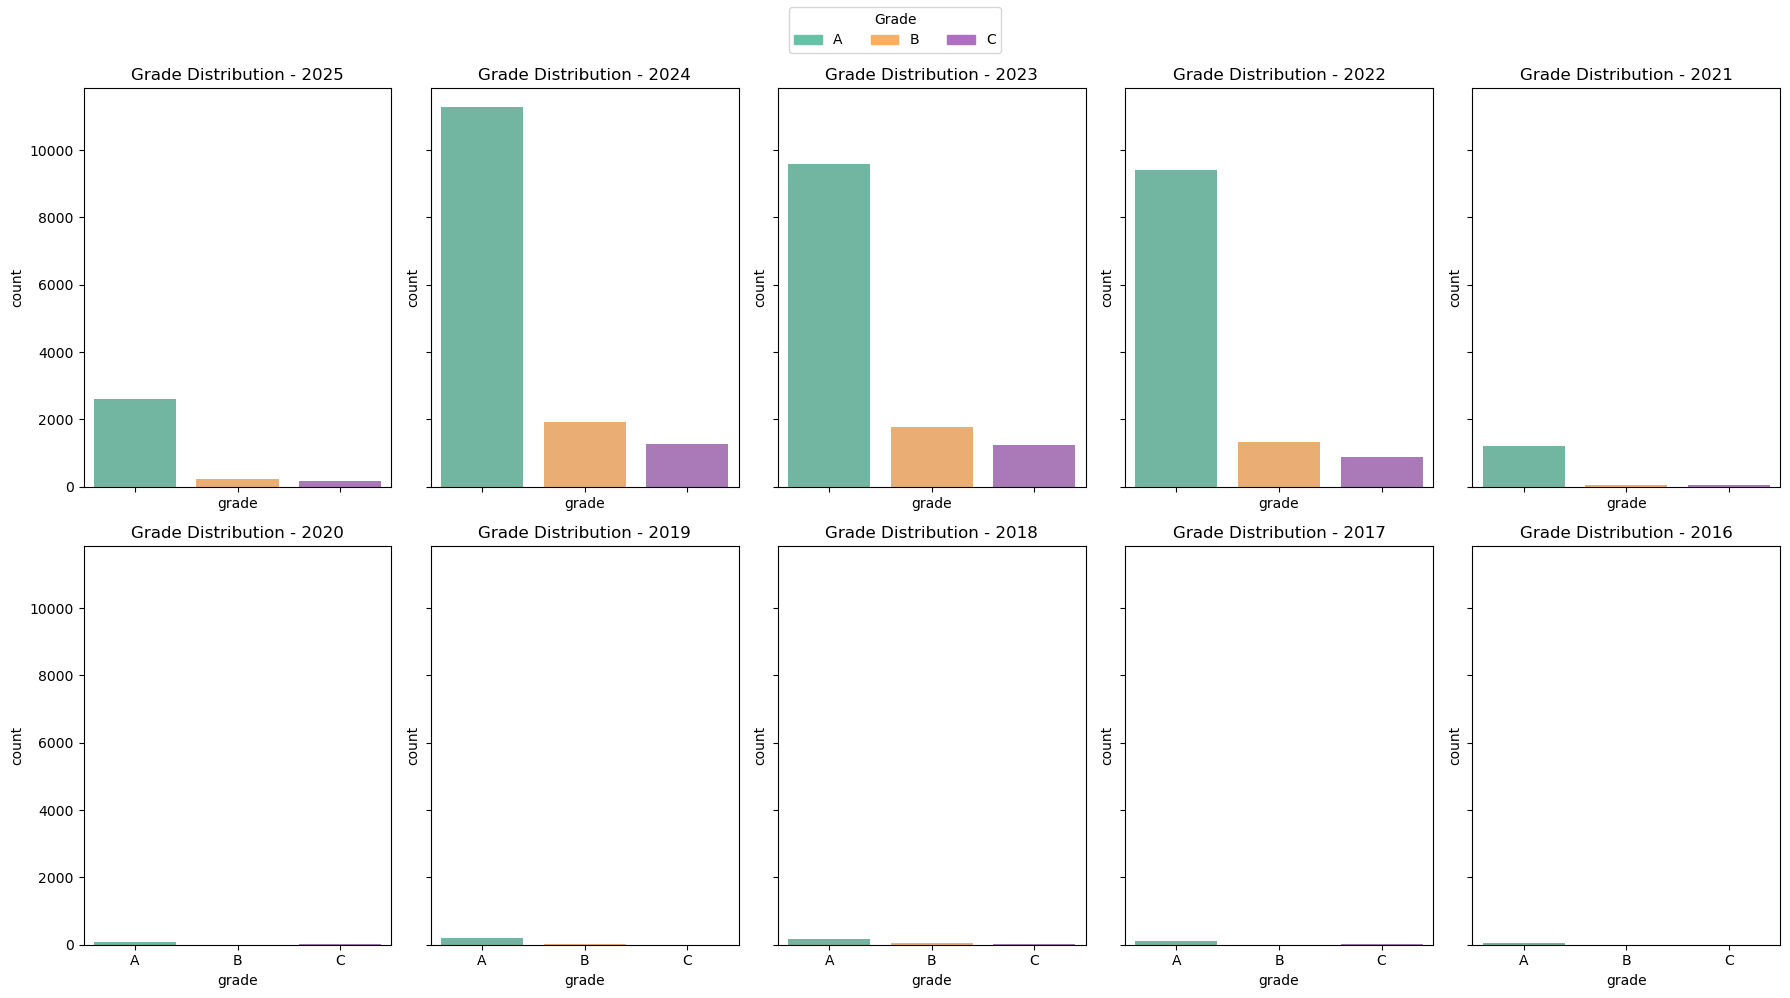

In [17]:
# Grade distribution per year

unique_grades = ['A', 'B', 'C']
color_dict = grade_colors  

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18, 10), sharex=True, sharey=True)

year = 2025
for x in range(2):
    for y in range(5):
        ax = axes[x, y]
        data_year = df[df['grade_date'].dt.year == year]
        
        if not data_year.empty:
            sns.countplot(x="grade", data=data_year, ax=ax,
                          palette=color_dict, order=unique_grades)
            ax.set_title(f'Grade Distribution - {year}')
        else:
            ax.axis('off')  # Hide the empty plot

        year -= 1

legend_handles = [Patch(color=color_dict[grade], label=grade) for grade in unique_grades]
fig.legend(handles=legend_handles, title="Grade", loc='upper center', ncol=len(unique_grades))

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



In [21]:
# Filter data for 2024
df_2024 = df[df['grade_date'].dt.year == 2024].copy()

grade_counts = (
    df_2024.groupby(['zipcode', 'latitude', 'longitude', 'grade'])
    .size()
    .reset_index(name='count')
)

fig = px.scatter_mapbox(
    grade_counts,
    lat='latitude',
    lon='longitude',
    color='grade',
    #size='count',
    hover_name='zipcode',
    hover_data={'count': True},
    zoom=11,
    height=600,
    title="NYC Grade Distribution by Zip Code (2024)",
    color_discrete_map=grade_colors,
    category_orders={'grade': ['A', 'B', 'C']}
)

fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0})
fig.show()


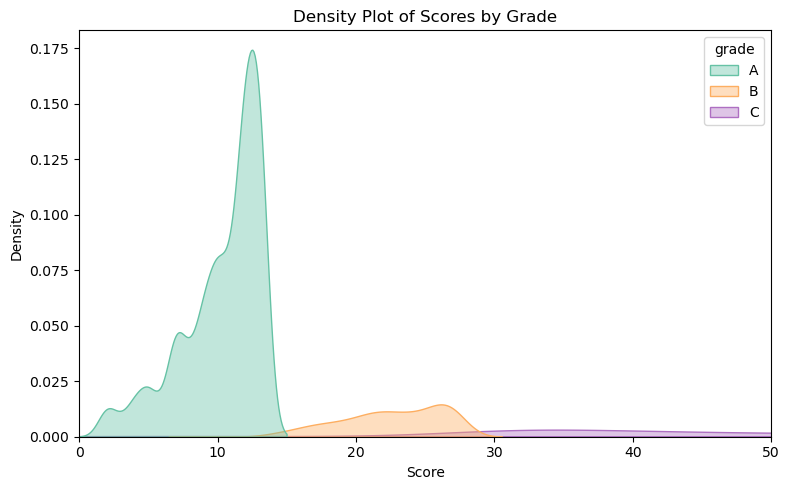

In [19]:
plt.figure(figsize=(8, 5))
sns.kdeplot(
    data=df_2024,
    x='score',
    hue='grade',
    palette=grade_colors,
    fill=True,
    alpha=0.4,
    bw_adjust=1.5 
)

plt.title('Density Plot of Scores by Grade')
plt.xlabel('Score')
plt.ylabel('Density')
plt.xlim(0, 50)  
plt.tight_layout()
plt.show()